In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = sns.load_dataset("tips")

In [2]:
# Lineplot - 선그래프
# 일기 예보에서의 온도 변화, 주가 변화량을 나타내는 그래프 등 시간의 변화에 따른 값의 변화를 나타낼 때 많이 사용.
# x축에 연도, 월, 일 같은 시간을 사용하면 시간에 따른 데이터 변화 추이를 쉽게 확인 가능.
# 선그래프는 변수의 변화, 트렌드, 변화율 정보가 중요한 경우에 사용.

In [10]:
# 기본 문법
# 'sns.lineplot(x, y)'

# parameter 01. x
# x축 변수

# parameter 02. y
# y축 변수

# parameter 03. hue
# grouping할 변수 (색상으로 구분)

# parameter 04. size
# grouping할 변수 (점의 크기로 구분)

# parameter 05. style
# grouping할 변수 (점의 모양으로 구분)

# parameter 06. data
# Dataframe 또는 다차원 배열

# parameter 07. ci
# 신뢰구간의 값을 설정. 기본값은 95%.

<Axes: >

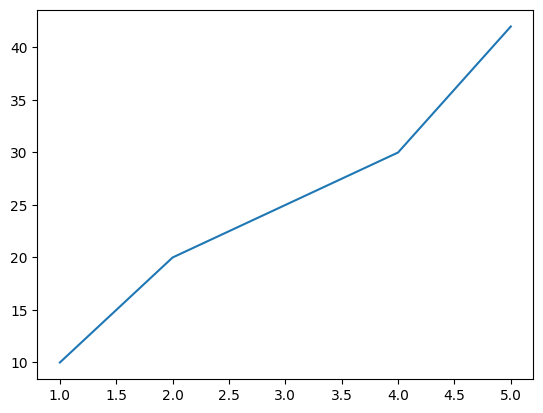

In [4]:
# 기본적인 lineplot 생성하기.
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]

sns.lineplot(x=x, y=y)

# x축은 왜 실수로 나오고, y축은 왜 정수로 표시되는거지
# seaborn은 내부에서 matplotlib을 logic으로 사용한다고 하네요.
# 맞네. 저수준인 matplotlib을 고수준으로 사용하도록 한 것이 seaborn이니까, 내부 logic은 matplotlib으로 돌아가겠네.

# Matplotlib은 기본적으로 'AutoLocator' 같은 자동 locator를 사용해, 현재 축 범위에서 너무 빽빽하지 않게 보기 좋은 간격의 tick을 골라 배치하려 함.
# 그 과정에서 아래와 같이 tick을 0.5로 설정한 것.
# 물론 seaborn으로 그래프를 만들 때, matplotlib의 Axes(축)을 설정하여 그래프 생성 가능.

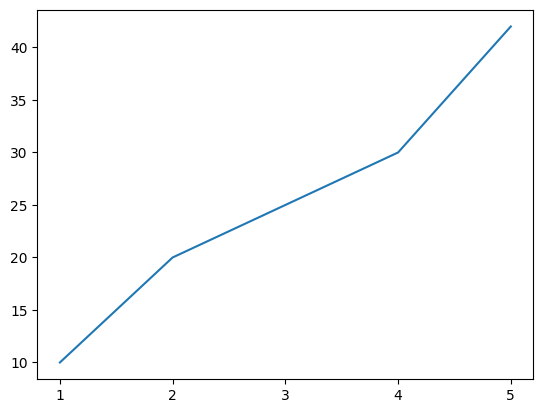

In [5]:
# 기본적인 lineplot 생성 심화 01.
# matplotlib의 AutoLocator이 돌게 하지 않고 축을 직접 설정하기.
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]

ax = sns.lineplot(x=x, y=y)

ax.set_xticks(x)            # x에 있는 값만 tick으로 사용하도록 설정하는 코드.
ax.set_xticklabels(x)       # label도 x에 존재하는, 즉 5개의 정수값만 사용하도록 하는 코드.

plt.show()

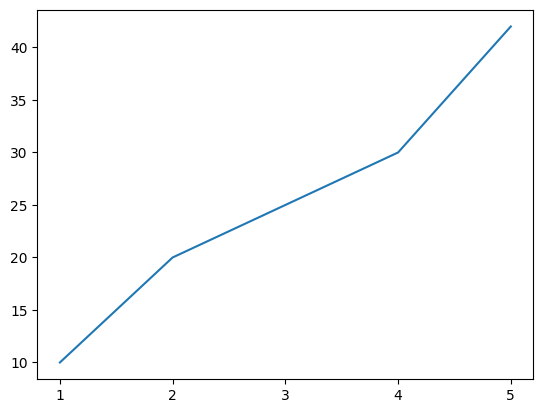

In [7]:
# 기본적인 lineplot 생성 심화 02.
# 눈금 간격을 1로 고정하기.
# 데이터가 연속된 정수일 때 유용함.
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]

ax01 = sns.lineplot(x=x, y=y)

ax01.xaxis.set_major_locator(ticker.MultipleLocator(1))         # tick 간격을 1로 설정.

plt.show()

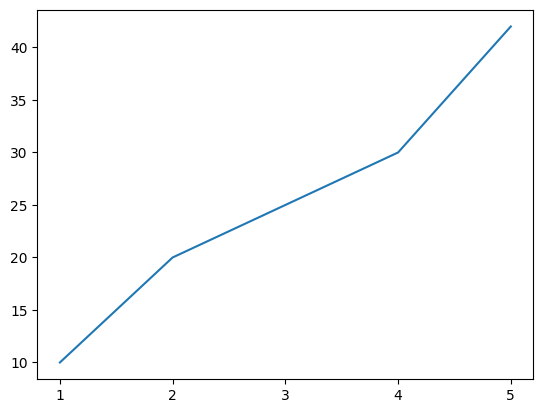

In [8]:
# 기본적인 lineplot 생성 심화 03
# 정수만 허용하도록 locator를 설정하기.
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]

ax02 = sns.lineplot(x=x, y=y)

ax02.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

<Axes: xlabel='size', ylabel='tip'>

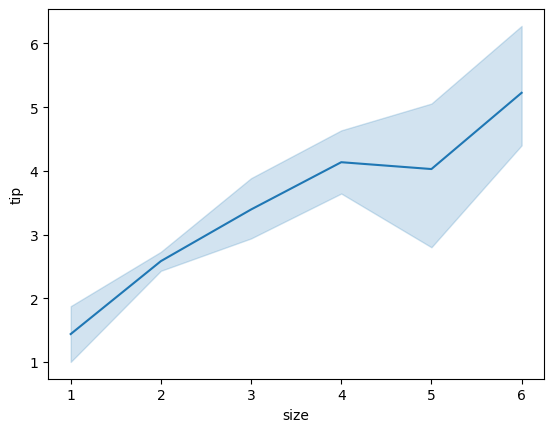

In [ ]:
# tips Dataset을 이용해 lineplot 그리기.
sns.lineplot(x=df["size"], y=df["tip"])

# 이전과 다르게 신뢰구간(값의 분포) 영역이 표시되는 이유
# x축 값에 해당하는 y축의 값이 여러 개 존재하기 때문에 값의 분포를 나타내는 영역이 표시됨.
# size 값에 따른 값의 편차가 서로 다른 정보를 확인할 수 있음.
# regplot과 동일하게 신뢰구간의 기본값은 95%.

min: 2.0, max: 5.14


<Axes: xlabel='size', ylabel='tip'>

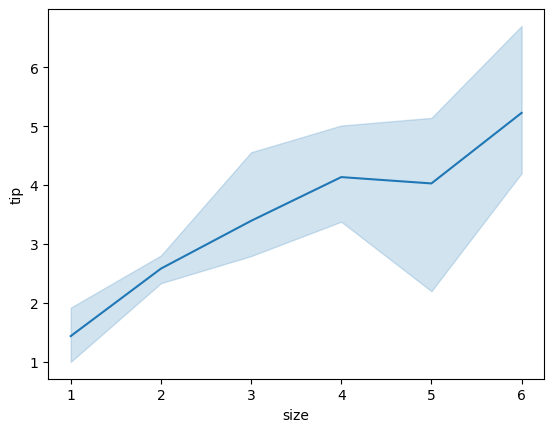

In [16]:
# ci parameter를 사용해 신뢰구간 기준값 변경하기.
# 우선 size가 5일 때, tip의 최솟값과 최댓값 구하기.
print(f"min: {min(df[df['size'] == 5]['tip'])}, max: {max(df[df['size'] == 5]['tip'])}")

# size를 x축으로, tip을 y축으로 설정해 데이터를 시각화하려 할 때, size가 5일 때 tip에 표시해야 하는 값은 2.0부터 5.14 이다.
# 이 2.0과 5.14의 값의 분포를 전체가 나오게 하려면, 신뢰구간의 기준을 100%로 설정하면 됨.
# sns.lineplot(x=df['size'], y=df['tip'], ci=100)

# 교재에 나와있는 것처럼 'ci=100'을 썼더니, FutureWarning이 발생함.
# 앞으로 ci parameter는 더 이상 사용되지 않을 것이라고 함.
# 그래서 ci가 아닌 'errorbar=('ci', 100)' parameter와 그 형식을 사용해야 함.
sns.lineplot(x=df['size'], y=df['tip'], errorbar=('ci', 100))       # 이 구문이 ci parameter를 사용하지 않고 신뢰구간의 값을 설정하는 코드임.

<Axes: xlabel='size', ylabel='tip'>

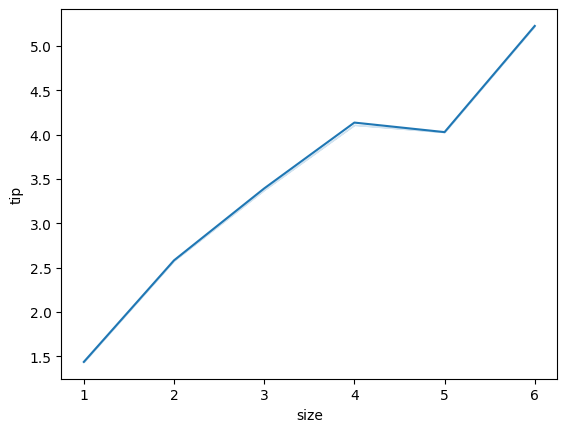

In [19]:
# 그러면 교재에서는 신뢰구간을 표시하지 않으려면 'ci=None'으로 작성하라고 했는데,
# errorbar parameter에서 동일한 결과를 출력하려면 어떻게 코드를 작성해야 할까?
sns.lineplot(x=df['size'], y=df['tip'], errorbar=('ci', 0))

# errorbar parameter의 ci는 0 ~ 100의 정수값을 주면 됨.
# None으로 처음에 입력했더니 int형이라고 error가 발생해서,
# 위 코드처럼 0으로 값을 수정했더니 신뢰구간 표시 없이 정상적으로 그래프가 생성됨.
# 앞으로 ci 대신 errorbar parameter를 쓰자.

<Axes: xlabel='size', ylabel='tip'>

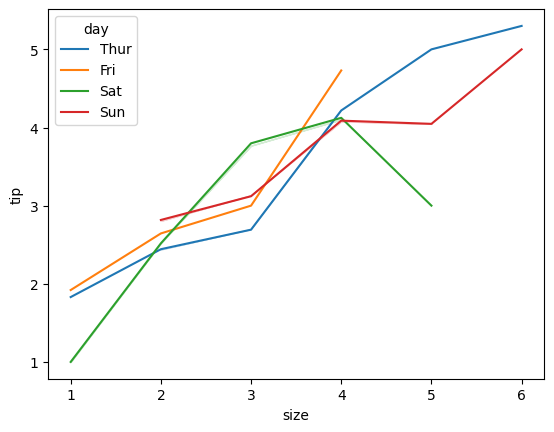

In [21]:
# 인원수에 따른 tip의 선그래프를 요일 별로 색상을 구분해 생성하기.
# hue parameter의 인자를 day로 설정하기.
sns.lineplot(x=df['size'], y=df['tip'], hue=df['day'], errorbar=('ci', 0))

# 4개의 요일 별로 서로 다른 색상의 4개의 선 그래프가 생성됨.
# 토요일과 일요일이 목요일과 금요일에 비해서 인원도 많이 오고, 팁 지불 금액이 더 높음.

<Axes: xlabel='size', ylabel='total_bill'>

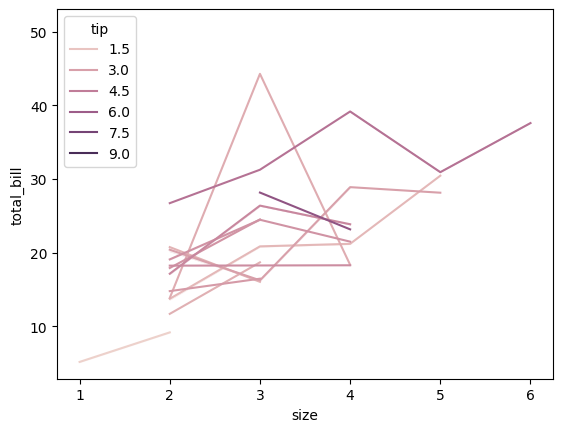

In [23]:
# hue parameter는 범주(category)에 따라 색상을 달리 지정하는데,
# 다양한 숫자 값이 들어있는 변수를 지정하면 의미를 해석하기 어려운 그래프가 생성됨.
# 데이터 사이즈가 크면 메모리에 큰 부하가 생겨 프로그램이 멈출 수 있으니 주의.
# hue parameter의 인자에 여러 속성을 지정해보자.
sns.lineplot(x=df['size'], y=df['total_bill'], hue=df['tip'], errorbar=('ci', 0))

# 굉장히 이상한 그래프가 생성됨.

In [25]:
# 선그래프는 시간에 따른 변화 추이를 분석할 때 적합한 시각화 방법.
# 시계열 데이터를 선 그래프로 시각화하게 될 경우, 특히 연속적인 데이터의 트렌드를 파악하고자 할 때, 여러 그룹 간의 변화 비교 패턴 비교 등에 유용함.
# 예측 모델의 결과를 시각화 할 때에도 유용.

# 선그래프 사용 시 주의점
# x축에는 '순서가 있는 변수'를 사용해야 함.
# hue parameter에는 범주형 변수만 사용해야 함.
# 신뢰구간이 필요없을 때는 'errorbar=('ci', 0)'으로 설정하면 좋음.